In [473]:
# Data handling
import json
import numpy as np
import pandas as pd
from rich import print

# NLP
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import preprocessing
from nltk import word_tokenize

# Visualization
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")


def extract_tf_idf(documents, ngram_range=(1, 3)):
    no_features = None
    tfidf_vectorizer = TfidfVectorizer(max_features=no_features, ngram_range=ngram_range)
    tf_idf = tfidf_vectorizer.fit_transform(documents)
    tfidf_feature_names = tfidf_vectorizer.get_feature_names()
    df_idf = pd.DataFrame(np.array([tfidf_feature_names, tfidf_vectorizer.idf_]).T, columns=['Word', 'IDF'])
    
    return df_idf

def get_top_n_words(corpus, n=None, stopwords=None, ngram_range=(1, 1)):
    """ List the top n words in a vocabulary according to occurrence in a text corpus. """
    vec = CountVectorizer(ngram_range=ngram_range, stop_words=stopwords).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


def visualize_word_frequenty(data, n):
    f, ax = plt.subplots(figsize=(10, 4))
    sns.barplot(y=[x[0] for x in data[:n]], x=[y[1] for y in data[:n]], color='b')


with open('coco_reviews.json') as f:
    coco = json.load(f)
    
with open('frozen_reviews.json') as f:
    frozen = json.load(f)

## Analysis

In [83]:
freq = get_top_n_words(coco, n=100, stopwords="english", ngram_range=(1, 1))

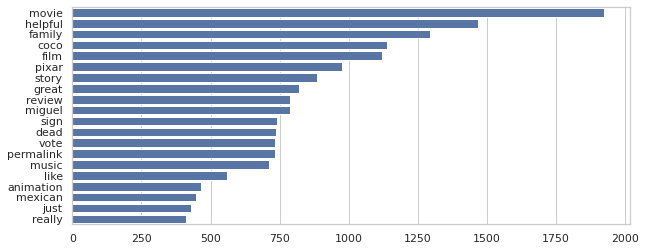

In [84]:
visualize_word_frequenty(freq, 20)

In [485]:
df_idf = extract_tf_idf(coco, ngram_range=(1, 3))

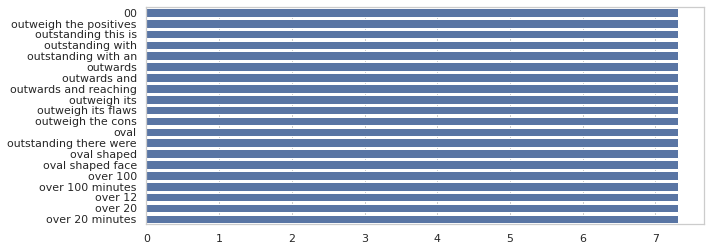

In [486]:
visualize_word_frequenty([tuple(r) for r in df_idf.sort_values("IDF", ascending=False).to_numpy()], 20)

## Compare

In [457]:
def c_tf_idf(documents, m):
    """ Calculate Class-based TF-IDF
    
    The result is a single score for each word
    
    documents = list of documents where each entry contains a single string
    of each class. For example, let's say you have 200 documents per class and you have 2 classes. 
    The documents is a list of two documents, where each document is a join of all 200 documents. 
    
    m = total number of documents
    
    """
    
    count = CountVectorizer(ngram_range=(1, 1)).fit(documents)
    t = count.transform(documents)
    t = np.array(t.todense()).T
    w = t.sum(axis=0)
    tf = np.divide(t+1,w+1)
    sum_tij = np.array(t.sum(axis=1)).T
    idf = np.log(np.divide(m, sum_tij)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)
    
    return tf_idf

In [458]:
documents = [coco_single, frozen_single]
m = len(coco) + len(frozen)
tf_idf = c_tf_idf(documents, m)

In [506]:
result = pd.DataFrame(tf_idf, index=count.get_feature_names(), columns=["Coco", "Frozen"])

In [507]:
result.sort_values("Coco", ascending=False).head(10)

,Coco,Frozen
miguel,0.004653,0.000003
dead,0.004461,0.000110
coco,0.004324,0.000004
mexican,0.004090,0.000010
culture,0.003794,0.000109
pixar,0.003756,0.000337
de,0.003597,0.000006
land,0.003271,0.000192
day,0.003066,0.000676
ernesto,0.003015,0.000007


In [508]:
result["Importance"] = result.Coco.values / result.drop("Coco", 1).reset_index(drop=True).sum(axis=1).values

In [509]:
result.sort_values("Importance", ascending=True).head(10)

,Coco,Frozen,Importance
anna,1.381867e-06,0.001368,0.001010
elsa,7.788743e-07,0.000459,0.001699
ice,7.330988e-06,0.002563,0.002860
kristoff,1.004582e-05,0.002185,0.004598
sisters,1.078035e-05,0.002062,0.005227
hans,1.705704e-05,0.002413,0.007067
snowman,1.724231e-05,0.002400,0.007183
queen,1.750207e-05,0.002382,0.007348
snow,2.422801e-05,0.002469,0.009812
powers,2.438791e-05,0.002462,0.009904


In [511]:
result.sort_values("Frozen", ascending=False).head(10)

,Coco,Frozen,Importance
sister,0.000062,0.002610,0.023765
ice,0.000007,0.002563,0.002860
olaf,0.000199,0.002476,0.080221
snow,0.000024,0.002469,0.009812
powers,0.000024,0.002462,0.009904
hans,0.000017,0.002413,0.007067
snowman,0.000017,0.002400,0.007183
queen,0.000018,0.002382,0.007348
let,0.000433,0.002376,0.182069
princess,0.000035,0.002372,0.014759
